upload data and unzip

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/train/
   creating: data/train/cat/
  inflating: data/train/cat/11.jpeg  
  inflating: data/train/cat/25.jpeg  
  inflating: data/train/cat/5.jpeg   
  inflating: data/train/cat/16.jpeg  
  inflating: data/train/cat/17.jpeg  
  inflating: data/train/cat/10.jpg   
  inflating: data/train/cat/9.jpg    
  inflating: data/train/cat/6.jpeg   
  inflating: data/train/cat/7.jpeg   
  inflating: data/train/cat/12.jpeg  
  inflating: data/train/cat/8.jpeg   
  inflating: data/train/cat/13.jpeg  
  inflating: data/train/cat/14.jpeg  
  inflating: data/train/cat/18.jpeg  
  inflating: data/train/cat/15.jpeg  
  inflating: data/train/cat/19.jpeg  
  inflating: data/train/cat/20.jpeg  
  inflating: data/train/cat/21.jpeg  
  inflating: data/train/cat/22.jpeg  
  inflating: data/train/cat/23.jpeg  
  inflating: data/train/cat/24.jpeg  
  inflating: data/train/cat/27.jpeg  
  inflating: data/train/cat/26.jpeg  
  inflating: data/train/cat/28.jpe

import model and normalize data


In [3]:
import torchvision
import torch
from torchvision import datasets, models, transforms
transforms = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406],
[0.229, 0.224, 0.225])
])
train_set = datasets.ImageFolder("data/train",transforms)
val_set = datasets.ImageFolder("data/val",transforms)
model = models.resnet34(pretrained=True)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=4,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_set, batch_size=1,
                                         shuffle=True, num_workers=2)
classes = ('cat','dog')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


show some training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([1, 1, 0, 0])


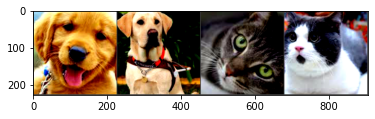

  dog   dog   cat   cat


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2.5 + 0.25     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print ('labels:',labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

modify last layer for 2 classes output

In [0]:
import torch.nn as nn
model.fc = nn.Linear(model.fc.in_features, 2)

define loss function and optimizer

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

train the network with validation

In [7]:
avgloss = []
total = 0
correct = 0
vloss = []
vcorrect = 0
vtotal = 0
for epoch in range(20):  # loop over the dataset multiple times 
# one epoch means run over whole data once
#####################Train###############################
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        #print(i)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print(labels)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)

        _, predicted = torch.max(outputs, 1) 
        #print(predicted)
        for j in range(4):
          total = total + 1
          if labels[j] == predicted[j]:
            correct = correct + 1;
        #print(correct,'of',total, 'are correctly predicted')

        loss = criterion(outputs, labels)
        #print('every loss:',loss)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    # print every 15 mini-batches (15*4 = 16 = #pictures in one epoch)
    print(correct,'of',total, 'are correctly predicted')
    print('For epoch %d, every %5d mini-batches, average loss: %.3f' % (epoch + 1, 15, running_loss / 15))
    avgloss.append(running_loss / 15)
    running_loss = 0.0
#####################Validation###############################
    with torch.no_grad():
        dataiter = iter(valloader)
        vimages, vlabels = dataiter.next()
        vimages, vlabels = data
        voutputs = model(vimages)
        VLOSS = criterion(voutputs, vlabels)
        vloss.append(VLOSS)
        _, vpredicted = torch.max(voutputs, 1)
        vtotal += vlabels.shape[0]
        vcorrect += (vpredicted == vlabels).sum().item()
        print('Validation loss: ',VLOSS.item(),'; ',vcorrect,'of',vtotal,'are correctly predicted')


33 of 60 are correctly predicted
For epoch 1, every    15 mini-batches, average loss: 0.725
Validation loss:  0.5202004313468933 ;  3 of 4 are correctly predicted
86 of 120 are correctly predicted
For epoch 2, every    15 mini-batches, average loss: 0.447
Validation loss:  0.2800843119621277 ;  7 of 8 are correctly predicted
136 of 180 are correctly predicted
For epoch 3, every    15 mini-batches, average loss: 0.425
Validation loss:  0.6035112738609314 ;  9 of 12 are correctly predicted
193 of 240 are correctly predicted
For epoch 4, every    15 mini-batches, average loss: 0.277
Validation loss:  0.47188130021095276 ;  13 of 16 are correctly predicted
250 of 300 are correctly predicted
For epoch 5, every    15 mini-batches, average loss: 0.259
Validation loss:  0.09949465095996857 ;  17 of 20 are correctly predicted
308 of 360 are correctly predicted
For epoch 6, every    15 mini-batches, average loss: 0.238
Validation loss:  0.1905616968870163 ;  21 of 24 are correctly predicted
365 

Plot loss curves for train and validation

Finished Training
Accuracy of the validation images: 96 %
Accuracy of the the  test images: 90 %


Text(0, 0.5, 'loss')

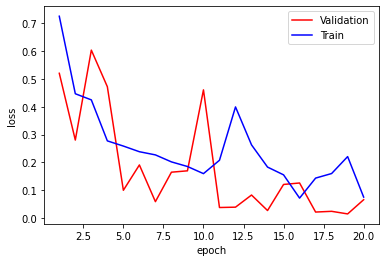

In [9]:
print('Finished Training')
print('Accuracy of the validation images: %d %%' % (100 * vcorrect / vtotal))
print('Accuracy of the the  test images: %d %%' % (100 * correct / total))
plt.figure()
vepoch = range(1,21)
plt.plot(vepoch,vloss,'r',label='Validation')
plt.legend()
epoch = range(1,21)
plt.plot(epoch,avgloss,'b',label='Train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

Take a test

take a look at a part of test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


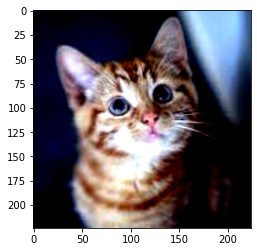

GroundTruth:    cat
Predicted:    cat


In [24]:
dataiter = iter(valloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

outputs = model(images)
#print(outputs)
_, predicted = torch.max(outputs, 1)
#print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

Accuracy of the network on the 24 test images: 95 %


Text(0, 0.5, 'loss')

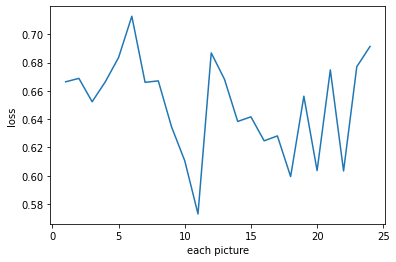

In [0]:
LOSS = []
correct = 0
total = 0
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = model(images)
        loss = criterion(outputs, labels)
        LOSS.append(loss)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 24 test images: %d %%' % (100 * correct / total))
#print(LOSS)
plt.figure()
epoch = range(1,25)
plt.plot(epoch,LOSS)
plt.xlabel('each picture')
plt.ylabel('loss')

In [26]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        label = labels.item()
        #print(label)
        class_correct[label] += c.item()
        class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of   cat : 91 %
Accuracy of   dog : 100 %
